In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

data = pd.read_excel('sample.xlsx')


In [2]:
data

,Date,Value
0,2024-03-01,11
1,2024-03-02,7
2,2024-03-03,10
3,2024-03-04,4
4,2024-03-05,9
...,...,...
173,2024-08-21,6
174,2024-08-22,6
175,2024-08-23,11
176,2024-08-24,1


C:\Users\sefa.yapici\AppData\Local\Temp\ipykernel_12092\3463937900.py:21: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  seasonality_table = result_data.groupby('DayOfTheWeek').sum().reset_index()


<Axes: xlabel='Date'>

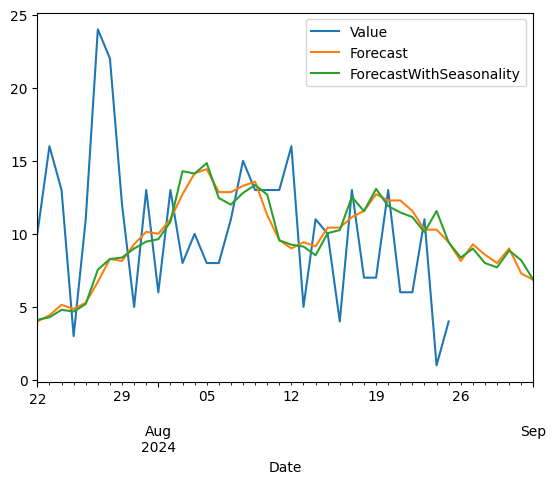

In [4]:
# method 1 : Simple Moving Average

ma_range = 7
period = 'day'
last_date = data['Date'].max()
enable_seasonality = True

forecast_df = pd.DataFrame()
if period == "day":
    forecast_df['Date'] = [last_date + timedelta(days=x) for x in range(1, ma_range + 1)]
    forecast_df['Value'] = np.nan

    result_data = pd.concat([data, forecast_df]).reset_index(drop=True)
    result_data['Forecast'] = result_data['Value'].shift(ma_range).rolling(ma_range).mean()


    # Seasonality 
    if enable_seasonality:
        result_data['DayOfTheWeek'] = result_data['Date'].dt.day_name()

        seasonality_table = result_data.groupby('DayOfTheWeek').sum().reset_index()
        seasonality_table['TotalValue'] = seasonality_table.Value.sum()
        seasonality_table['SeasonalityIndex'] = (seasonality_table['Value'] / seasonality_table['TotalValue']) * 7
        seasonality_table = seasonality_table[['DayOfTheWeek', 'SeasonalityIndex']]
        result_data = pd.merge(result_data, seasonality_table, on='DayOfTheWeek', how='left')
        result_data['ForecastWithSeasonality'] = result_data['Forecast'] * result_data['SeasonalityIndex']
result_data.iloc[-42:].plot(x='Date',y=['Value','Forecast','ForecastWithSeasonality'])

In [4]:
result_data

,Date,Value,Forecast
0,2024-03-01,11.0,NaN
1,2024-03-02,7.0,NaN
2,2024-03-03,10.0,NaN
3,2024-03-04,4.0,NaN
4,2024-03-05,9.0,NaN
...,...,...,...
180,2024-08-28,NaN,8.571429
181,2024-08-29,NaN,8.000000
182,2024-08-30,NaN,9.000000
183,2024-08-31,NaN,7.285714


In [116]:

seasonality_table.head(15)

#seasonality_table['TotalValue'] = seas
#seasonality_table.head()

C:\Users\sefa.yapici\AppData\Local\Temp\ipykernel_7928\840175507.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  seasonality_table = data.groupby('DayOfTheWeek').sum().reset_index()


,DayOfTheWeek,Value,TotalValue,SeasonalityIndex
0,Friday,196,1395,0.983513
1,Monday,205,1395,1.028674
2,Saturday,224,1395,1.124014
3,Sunday,199,1395,0.998566
4,Thursday,192,1395,0.963441
5,Tuesday,193,1395,0.968459
6,Wednesday,186,1395,0.933333
